Modulo 2 : Introducción a la ciencia de datos

La base de datos contiene datos de 44,691 peliculas con los siguientes rubros(columnas) aqui descritos:


**id: El ID de la película (identificador único y claro).
**title: El título oficial de la película.
**tagline: El lema de la película.
**release_date: La fecha de lanzamiento en cines de la película.
**genres: Géneros asociados con la película.
**belongs_to_collection: Proporciona información sobre la serie o franquicia a la que pertenece la película en particular.
**original_language: El idioma en el que se filmó originalmente la película.
**budget_musd: El presupuesto de la película en millones de dólares.
**revenue_musd: Los ingresos totales de la película en millones de dólares.
**production_companies: Compañías de producción involucradas en la realización de la película.
**production_countries: Países donde se filmó o produjo la película.
**vote_count: El número de votos de los usuarios, según lo contado por TMDB.
**vote_average: El promedio de calificaciones de la película.
**popularity: La puntuación de popularidad asignada por TMDB.
**runtime: La duración de la película en minutos.
**overview: Una breve descripción de la película.
**spoken_languages: Idiomas hablados en la película.
**poster_path: La URL de la imagen del póster.
**cast: Actores (principales) que aparecen en la película.
**cast_size: Número de actores que aparecen en la película.
**director: Director de la película.
**crew_size: Tamaño del equipo de producción (incluye al director, excluye a los actores).

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

pd.options.display.float_format = '{:.2f}'.format

movies_df = pd.read_csv("movies_complete.csv")

movies_df.shape[:]


(44691, 22)

In [5]:
movies_df = pd.read_csv("movies_complete.csv", parse_dates= ["release_date"])

mov_com = movies_df[["title","release_date","budget_musd","revenue_musd","vote_count","vote_average","popularity","poster_path","belongs_to_collection"]].copy()

mov_com["roi"] = mov_com["revenue_musd"]/ mov_com["budget_musd"]

mov_com["profit_gross"] = mov_com["revenue_musd"]- mov_com["budget_musd"]

mov_com.columns = ["Title", "Date of Release", "Budget", "Revenue", 
                   "Votes", "Rating","Popularity","","Saga","Roi", "Profit"]

mov_com.set_index("Title",inplace=True)

mov_com.head()



,Date of Release,Budget,Revenue,Votes,Rating,Popularity,,Saga,Roi,Profit
Title,,,,,,,,,,
Toy Story,1995-10-30,30.00,373.55,5415.00,7.70,21.95,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story Collection,12.45,343.55
Jumanji,1995-12-15,65.00,262.80,2413.00,6.90,17.02,<img src='http://image.tmdb.org/t/p/w185//vgpX...,NaN,4.04,197.80
Grumpier Old Men,1995-12-22,NaN,NaN,92.00,6.50,11.71,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpy Old Men Collection,NaN,NaN
Waiting to Exhale,1995-12-22,16.00,81.45,34.00,6.10,3.86,<img src='http://image.tmdb.org/t/p/w185//4wjG...,NaN,5.09,65.45
Father of the Bride Part II,1995-02-10,NaN,76.58,173.00,5.70,8.39,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Collection,NaN,NaN


In [6]:
from IPython.display import HTML

from IPython.display import display

def tops(n, by, ascending=False, min_bud=0, min_votes=0):
    df2 = mov_com[(mov_com["Budget"] >= min_bud) & (mov_com["Votes"] >= min_votes)].sort_values(by=by, ascending=ascending).head(n)
    """
    La funcion tops devuelve una lista de "n" peliculas, agrupandolas con el criterio que se elija de las columnas contenidas
    en el data frame mov_com parametro "by", si se desea buscar las menores en el ranking en cuanto algún criterio se 
    modifica el parametro "ascending" por True.

    El parametro "min_bud" es para modificarse a criterio esto se refieren a sólo tomar en cuenta peliculas con un presupuesto
    minimo, ya que hay producciones con presupuestos muy bajo que sesgan los resultados de su retorno o rentabilidad.

    El parametro "min_votes" es para modificarse a criterio ya que hay producciones con poco numero de votos y esto afecta el promedio
    del rating, es decir se podrían tomar en cuenta producciones que cuenten con 10 votos en adelante como ejemplo.

    """

    return HTML(df2[["Date of Release",""]].to_html(escape=False))


Top 5 Mayor Presupuesto

In [7]:
tops(5,"Budget")

,Date of Release,
Title,,
Pirates of the Caribbean: On Stranger Tides,2011-05-14,
Pirates of the Caribbean: At World's End,2007-05-19,
Avengers: Age of Ultron,2015-04-22,
Superman Returns,2006-06-28,
John Carter,2012-03-07,


Top 5 más rentables

In [8]:
tops(5,"Profit")

,Date of Release,
Title,,
Avatar,2009-12-10,
Star Wars: The Force Awakens,2015-12-15,
Titanic,1997-11-18,
Jurassic World,2015-06-09,
Furious 7,2015-04-01,


Top 5 menos rentables

In [9]:
tops(5,"Profit",ascending=True)

,Date of Release,
Title,,
The Lone Ranger,2013-07-03,
The Alamo,2004-04-07,
Mars Needs Moms,2011-03-09,
Valerian and the City of a Thousand Planets,2017-07-20,
The 13th Warrior,1999-08-27,


Top 5 Mejor retorno de inversión

In [10]:
tops(5,"Roi")


,Date of Release,
Title,,
Less Than Zero,1987-11-06,
Modern Times,1936-02-05,
Welcome to Dongmakgol,2005-08-04,
Aquí Entre Nos,2012-03-30,
"The Karate Kid, Part II",1986-06-18,


Top 5 peor Retorno de inversión

In [11]:
tops(5,"Roi",ascending=True)

,Date of Release,
Title,,
Chasing Liberty,2004-01-09,
The Cookout,2004-09-03,
Never Talk to Strangers,1995-10-20,
To Rob a Thief,2007-08-31,
Deadfall,1993-10-08,


Top 5 con mas votos

In [12]:
tops(5,"Votes")

,Date of Release,
Title,,
Inception,2010-07-14,
The Dark Knight,2008-07-16,
Avatar,2009-12-10,
The Avengers,2012-04-25,
Deadpool,2016-02-09,


Top 5 Mejores Calificadas

In [13]:
tops(5,"Rating")


,Date of Release,
Title,,
Time Pass,2014-01-03,
Shuttlecock Boys,2012-08-02,
Forever,2006-10-05,
Souls of Zen: Ancestors and Agency in Contemporary Japanese Temple Buddhism,2012-06-01,
Elaine Stritch: At Liberty,2002-01-01,


Top 5 Peores Calificadas

In [14]:
tops(5,"Rating",ascending=True)

,Date of Release,
Title,,
Extinction: Nature Has Evolved,2017-03-10,
Roukli,2015-09-17,
Joe and Max,2002-03-03,
Call Me by Your Name,2017-10-27,
Unrated II: Scary as Hell,2011-02-26,


Top 5 Mayor Popularidad

In [15]:
tops(5,"Popularity")

,Date of Release,
Title,,
Minions,2015-06-17,
Wonder Woman,2017-05-30,
Beauty and the Beast,2017-03-16,
Baby Driver,2017-06-28,
Big Hero 6,2014-10-24,


In [19]:
fran_single= movies_df[["title","release_date","budget_musd","revenue_musd","vote_count","vote_average","popularity","poster_path","belongs_to_collection"]].copy()

fran_single["roi"] = fran_single["revenue_musd"]/ fran_single["budget_musd"]

fran_single["profit_gross"] = fran_single["revenue_musd"]- fran_single["budget_musd"]

fran_single.columns = ["Title", "Date of Release", "Budget", "Revenue", 
                   "Votes", "Rating","Popularity","","Saga","Roi", "Profit"]

fran_single.set_index("Title",inplace=True)


singles  = pd.isnull(fran_single['Saga'])

franchises = pd.notna(fran_single["Saga"])

singles_dt  =  fran_single[singles]

fran_dt = fran_single[franchises]


def versus(by,n,mean=True):

    if mean == True:
        graf_singles = singles_dt.sort_values(by=by, ascending=False).head(n)

        singles_x = np.mean(graf_singles[by])

        graf_franchise = fran_dt.sort_values(by=by, ascending=False).head(n)

        franchise_x = np.mean(graf_franchise[by])

    else:    
        graf_singles = singles_dt[singles_dt["Budget"]>=5].sort_values(by=by, ascending=False).head(n)

        singles_x = np.median(graf_singles[by])

        graf_franchise = fran_dt[fran_dt["Budget"]>=5].sort_values(by=by, ascending=False).head(n)

        franchise_x = np.median(graf_franchise[by])
    """
    La funcion versus devuelve una gráfica, comparando la media o mediana según se indique,agrupando los datos según el  parametro "by" este siendo
    el nombre de una columa de los dataframes singles_dt o fran_dt.

    El parametro "n" se modifica para disminuir o ampliar la selección de datos que se toman para el cálculo de la media o mediana según se indique.

    El parametro "mean" se mantiene por default en True para obtener la media en el cálculo, al modificarse por "False" se utiliza la mediana
    para el calculo.

    """


    data = pd.DataFrame({'Category': ['Singles', 'Franchise'], 'Mean': [singles_x, franchise_x]})
    sns.barplot(data=data, x='Category', y="Mean",palette="terrain")

    plt.title("{} Top Singles vs {} Top Franchises".format(n,n))
    plt.xlabel("Type of Production")
    plt.ylabel("Mean of {}".format(by))

    return plt.show()

In [ ]:
# # ¿Las sagas tienen mas éxito?

Saga vs. Sencilla : Ingreso promedio

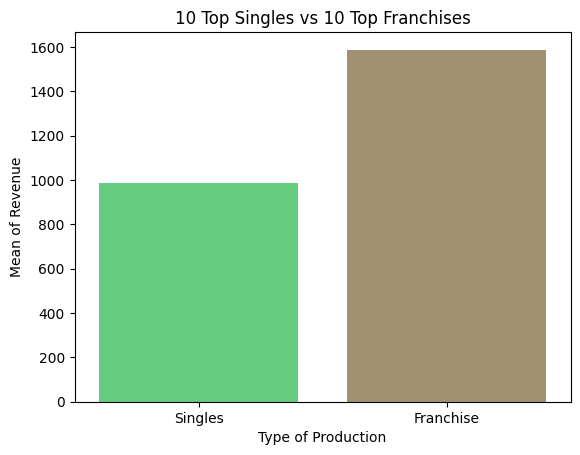

In [20]:
versus(by="Revenue",n = 10)


Saga vs. Sencilla: Roi Mediana

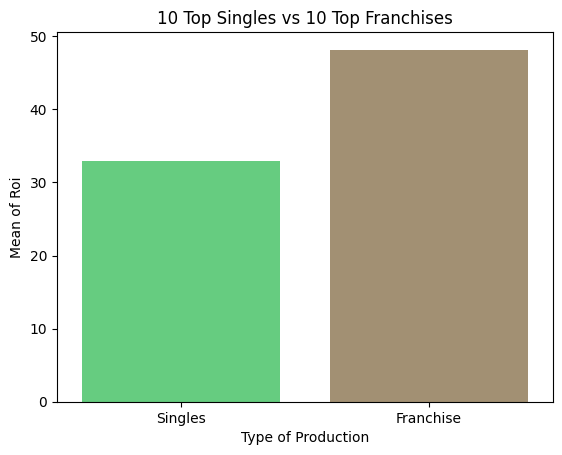

In [94]:
versus(by="Roi",n = 10, mean = False)

Saga vs. Sencilla: Presupuesto promedio

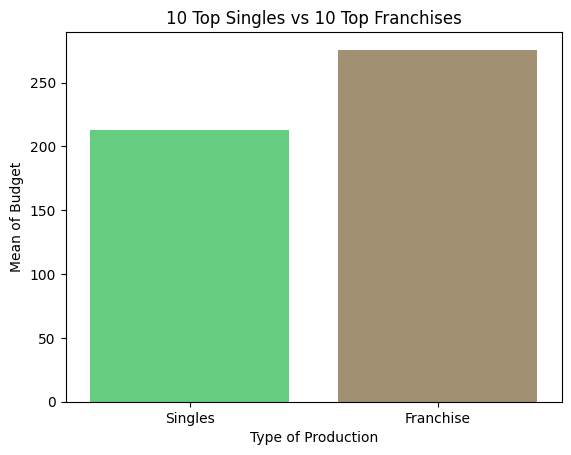

In [95]:
versus(by="Budget",n = 10)

Saga vs. Sencilla: Popularidad promedio

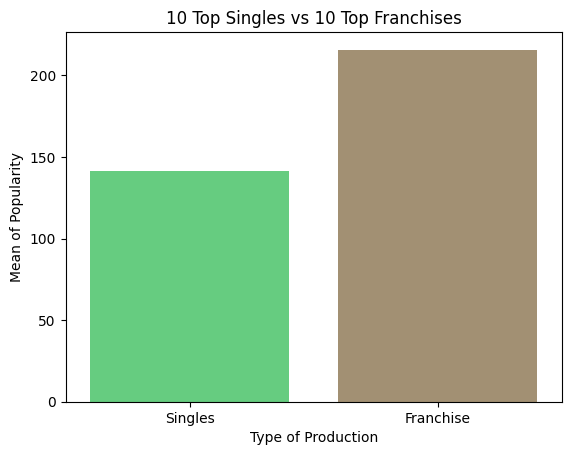

In [96]:
versus(by="Popularity",n = 10)

Saga vs. Sencilla: Califiación Promedio

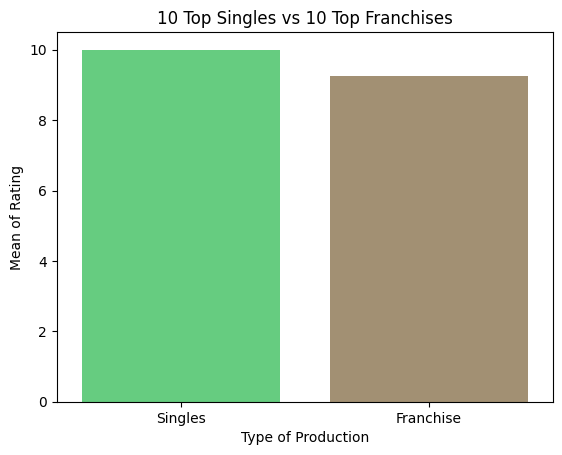

In [97]:
versus(by="Rating",n = 10)

## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [22]:

def tops_franchises(n, by, mean=True):
    if mean==True:
        df1 = fran_dt.groupby("Saga")[by].mean()
        df2 = df1.sort_values(ascending=False).head(n)
    else:
        df1 = fran_dt.groupby("Saga")[by].median()
        df2 = df1.sort_values(ascending=False).head(n)
   
    return df2

# Call the tops_franchises() function with desired parameters


In [36]:
total_fran = fran_dt.shape[:]

print("Hay {} de peliculas pertenecientes a una franquicia".format(total_fran[0]))

Hay 4463 de peliculas pertenecientes a una franquicia


Top 10 Sagas Presupuesto Promedio

In [84]:
tops_franchises(10, "Budget", mean=True)

Saga
Tangled Collection                    260.00
The Avengers Collection               250.00
Pirates of the Caribbean Collection   250.00
The Hobbit Collection                 250.00
Man of Steel Collection               237.50
Avatar Collection                     237.00
The Amazing Spider-Man Collection     207.50
World War Z Collection                200.00
Spider-Man Collection                 199.00
The Dark Knight Collection            195.00
Name: Budget, dtype: float64

Top 10 Sagas Mediana de presupuesto

In [85]:
tops_franchises(10, "Budget", mean=False)

Saga
Tangled Collection                    260.00
The Avengers Collection               250.00
The Hobbit Collection                 250.00
Man of Steel Collection               237.50
Avatar Collection                     237.00
Pirates of the Caribbean Collection   230.00
The Amazing Spider-Man Collection     207.50
Iron Man Collection                   200.00
Spider-Man Collection                 200.00
World War Z Collection                200.00
Name: Budget, dtype: float64

Top 10 Sagas Ingreso Promedio

In [86]:
tops_franchises(10, "Revenue", mean=True)

Saga
Avatar Collection                     2787.97
The Avengers Collection               1462.48
Frozen Collection                     1274.22
Finding Nemo Collection                984.45
The Hobbit Collection                  978.51
The Lord of the Rings Collection       972.18
Harry Potter Collection                963.42
Star Wars Collection                   929.31
Despicable Me Collection               922.77
Pirates of the Caribbean Collection    904.32
Name: Revenue, dtype: float64

Top 10 Sagas Mediana de Ingreso

In [87]:
tops_franchises(10, "Revenue", mean=False)

Saga
Avatar Collection                     2787.97
The Avengers Collection               1462.48
Frozen Collection                     1274.22
The Dark Knight Collection            1004.56
Despicable Me Collection               995.41
Finding Nemo Collection                984.45
Pirates of the Caribbean Collection    961.00
The Hobbit Collection                  958.40
Harry Potter Collection                936.09
The Lord of the Rings Collection       926.29
Name: Revenue, dtype: float64

Top 10 Sagas promedio de califación

In [23]:
tops_franchises(10, "Rating", mean=True)

Saga
Argo Collection                       9.30
Bloodfight                            9.00
Kenji Misumi's Trilogy of the Sword   9.00
Dreileben                             9.00
Алиса в стране чудес (Коллекция)      8.70
We Were Here                          8.65
Kizumonogatari                        8.63
Spirits' Homecoming Collection        8.50
Glass Tiger collection                8.50
OSS 117 The Original Saga             8.50
Name: Rating, dtype: float64